In [31]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96,input_shape=(256,256,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
#model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
#model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(6))
model.add(Activation('softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 96)        34944     
_________________________________________________________________
activation_9 (Activation)    (None, 62, 62, 96)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 96)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 30, 30, 96)        384       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 256)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 256)       0         
__________

In [13]:
import tensorflow as tf
import time
from keras import optimizers
opt = optimizers.SGD(lr=1e-2, momentum=0.9,decay=0.0008)
#opt = Adam(lr=INIT_LR,decay=INIT_LR / EPOCHS)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])  #CrossEntropyLoss  'categorical_crossentropy'
from keras.callbacks import ReduceLROnPlateau
lr_reducer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3)

In [14]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=60, verbose=1
    
    )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/60
   4/1123 [..............................] - ETA: 3:20:30 - loss: 2.5441 - acc: 0.1875

D:\anaconda\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.289009). Check your callbacks.
  % delta_t_median)


1123/1123 [==============================] - 176s 156ms/step - loss: 12.2563 - acc: 0.2102 - val_loss: 11.9312 - val_acc: 0.2442
Epoch 2/60
1123/1123 [==============================] - 94s 84ms/step - loss: 11.2099 - acc: 0.2648 - val_loss: 10.1594 - val_acc: 0.3143
Epoch 3/60
1123/1123 [==============================] - 93s 83ms/step - loss: 9.9267 - acc: 0.3075 - val_loss: 8.3237 - val_acc: 0.3393
Epoch 4/60
1123/1123 [==============================] - 93s 83ms/step - loss: 8.3941 - acc: 0.3368 - val_loss: 5.9035 - val_acc: 0.3747
Epoch 5/60
1123/1123 [==============================] - 93s 83ms/step - loss: 7.5423 - acc: 0.3514 - val_loss: 6.0505 - val_acc: 0.4368
Epoch 6/60
1123/1123 [==============================] - 93s 83ms/step - loss: 7.0335 - acc: 0.3526 - val_loss: 4.8627 - val_acc: 0.4084
Epoch 7/60
1123/1123 [==============================] - 92s 82ms/step - loss: 7.0336 - acc: 0.3012 - val_loss: 3.5499 - val_acc: 0.4194
Epoch 8/60
1123/1123 [==============================]

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

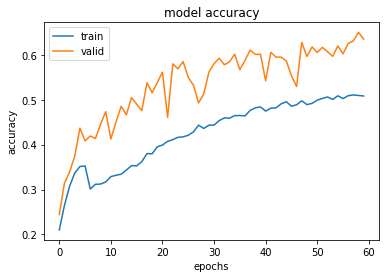

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

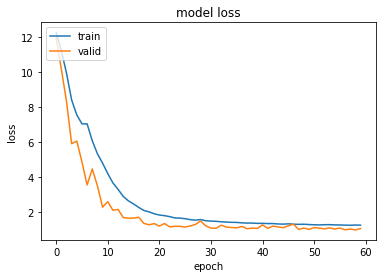

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, precision_score, recall_score

Y_preds = model.predict(x_test)

Y_preds = np.argmax(Y_preds, axis=1)
Y_true = np.argmax(y_test, axis=1)

acc = accuracy_score(np.round(Y_preds),Y_true)*100
cm = confusion_matrix(Y_true, np.round(Y_preds))
precision=precision_score(np.round(Y_preds),Y_true,average='weighted')*100
recall=recall_score(np.round(Y_preds),Y_true,average='weighted')*100
#tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\n============TEST METRICS=============')
#precision = tp/(tp+fp)*100
#recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['acc'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[279 107  95  11   6  11]
 [ 96 462 107  24   2  12]
 [ 61  59 471  17   2   0]
 [  1  10   4 290   0  82]
 [103  52   8  34  45  52]
 [ 29  17   1  75  16 356]]

============TEST METRICS=============
Accuracy: 63.49683016349683%
Precision: 67.5581257220285%
Recall: 63.49683016349683%
F1-score: 65.4645496791869

TRAIN METRIC ----------------------
Train acc: 50.84


In [19]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = [ 'Commom rust','Bipolaris maydis','Curvularia lunata(wakker) boed spot','Northern leaf blight','Own spot','Sheath blight']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

                                     precision    recall  f1-score   support

                        Commom rust       0.49      0.55      0.52       509
                   Bipolaris maydis       0.65      0.66      0.66       703
Curvularia lunata(wakker) boed spot       0.69      0.77      0.73       610
               Northern leaf blight       0.64      0.75      0.69       387
                           Own spot       0.63      0.15      0.25       294
                      Sheath blight       0.69      0.72      0.71       494

                        avg / total       0.64      0.63      0.62      2997



In [20]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
2997/2997 [==============================] - 5s 2ms/step
Test Accuracy: 63.4968301754297


In [21]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)

2997/2997 [==============================] - 5s 2ms/step
1.0639972091118892
0.634968301754297


In [22]:
print(history.history['val_acc'])

[0.24424424424921626, 0.31431431431431434, 0.3393393393443114, 0.3747080413846521, 0.43677010344671413, 0.40840840841338044, 0.41941941942936345, 0.41374708045352326, 0.44544544548522164, 0.4734734735132497, 0.4124124124223565, 0.4507841174706722, 0.4854854854954295, 0.4664664664764105, 0.5048381715147823, 0.490156823529933, 0.47580914251558537, 0.5378712045776474, 0.5155155155254596, 0.5385385385484825, 0.561227894571172, 0.46079412746576615, 0.5799132465898573, 0.5689022356086785, 0.5849182516246945, 0.5498832165896594, 0.532198865552087, 0.4928261595326024, 0.5128461795526223, 0.5615615616013377, 0.580246913600135, 0.5925925926124807, 0.5779112445977993, 0.5845845846044727, 0.6012679346410441, 0.5669002335867883, 0.5879212545879212, 0.6106106106304987, 0.6009342676208224, 0.601267934621156, 0.5422088755521529, 0.6056056056254937, 0.5949282616148164, 0.5949282616148164, 0.5865865866064747, 0.5535535535734416, 0.5295295295693058, 0.6276276276475158, 0.5962629295962629, 0.6176176176375

In [23]:
print(history.history['val_loss'])

[11.931246640087965, 10.159417901788506, 8.323690309260423, 5.903503572519199, 6.0505026679537, 4.862677640902189, 3.5498671832385362, 4.464275792872543, 3.4981837744389845, 2.284863077444675, 2.5961694550347163, 2.109443976058139, 2.1532483750038796, 1.6960663941052105, 1.6569409214897397, 1.6582531029278331, 1.7109184219195201, 1.3585134235110965, 1.2827513612108228, 1.3479692434564525, 1.2050285204116369, 1.3539408899204788, 1.1636013776650618, 1.1927866998178625, 1.1935900372189205, 1.1520273864846011, 1.2163328991399274, 1.3006550270714758, 1.4958840407130318, 1.2183292577534786, 1.0914468407670697, 1.0814386508565845, 1.259417630093154, 1.1477140680845475, 1.1257416449827793, 1.1064144135476113, 1.1868659065570837, 1.0552228597907332, 1.0950756896166631, 1.0708632322403047, 1.2742491001322305, 1.0758824990437672, 1.204757214149396, 1.1586179122910485, 1.1137553859162737, 1.2222664588922494, 1.3120022886070681, 1.016796006494496, 1.0914119065384646, 1.019160734759914, 1.1227582386

In [24]:
print(history.history['acc'])

[0.21015138023152272, 0.2648630594555558, 0.3075038966855714, 0.3368960142507237, 0.3513694054776219, 0.3525940770496108, 0.30115787129815186, 0.3117345802716544, 0.3122912491649967, 0.3169672678690715, 0.32887998219323145, 0.3317746604386111, 0.3343353373479854, 0.34335337342012967, 0.35337341350029, 0.35281674460031176, 0.36216878200846137, 0.3800935203740815, 0.3796481852627257, 0.3952349142796264, 0.3991315965330221, 0.40737029615116926, 0.4111556446258965, 0.41638833222331356, 0.4172790024626152, 0.4209530171454019, 0.4283010465408375, 0.4434424404397464, 0.43609441104762886, 0.44333110666439596, 0.44355377422173287, 0.4535738142985752, 0.45958583834335337, 0.45880650190594624, 0.464707192162102, 0.46492985972607487, 0.4640391895033633, 0.4762859051568926, 0.48207526163437986, 0.48396793587174347, 0.47472723224558033, 0.4811845914050323, 0.4819639278557114, 0.4907592963771548, 0.4956579826352485, 0.4856379425584062, 0.4887552883677588, 0.49766199064796257, 0.48920062348243254, 0.4

In [25]:
print(history.history['loss'])

[12.256316340617165, 11.209928183002425, 9.926817916066575, 8.393818029235078, 7.542918930338263, 7.0336404663500876, 7.033481871383648, 6.066450331304525, 5.328296458368125, 4.795175909066991, 4.199734792601051, 3.6673730450944255, 3.298783872340416, 2.8983677934894208, 2.644650224746402, 2.468140271718134, 2.2723695419594376, 2.09841999323324, 2.0176723592930608, 1.9091366351885086, 1.8358616566663328, 1.8009365058853057, 1.7457232569246668, 1.6715612639246897, 1.6604546893017247, 1.6285446639104506, 1.5731506008954284, 1.5450272395281133, 1.5780848624100534, 1.510179428793067, 1.4921676900757896, 1.478549999958209, 1.4528903638406099, 1.4336450925730193, 1.4208844539663144, 1.4162106539990211, 1.3897949680005806, 1.378821733520281, 1.3776916867506528, 1.361918038593, 1.3620875545079978, 1.3492520149076364, 1.3505683749535917, 1.328088027070291, 1.3181776031569739, 1.3354000018768972, 1.3157884049617323, 1.3045198333685448, 1.3118057970585522, 1.2944439595166624, 1.2818883368390834, 

In [26]:
pred = model.predict(x_test,verbose=1)
y_pred = np.argmax(pred, axis = 1)
y_pred

2997/2997 [==============================] - 5s 2ms/step


array([2, 5, 0, ..., 2, 0, 1], dtype=int64)

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[279 107  95  11   6  11]
 [ 96 462 107  24   2  12]
 [ 61  59 471  17   2   0]
 [  1  10   4 290   0  82]
 [103  52   8  34  45  52]
 [ 29  17   1  75  16 356]]


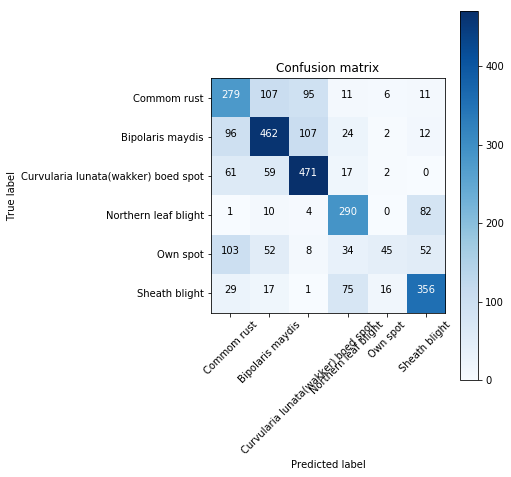

In [28]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')